In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
df = pd.read_csv("dataset_predicciones_filtrado.csv", sep = ';')
df.head()

,bathrooms,hasLift,latitude,longitude,newDevelopment,price,rooms,size,exterior_0,exterior_1,...,hasParking,property_chalet,property_duplex,property_penthouse,property_studio,status_renew,y_pred,rentabilidad,property_type,floor_type
0,1.0,False,37.391332,-5.962275,False,114000.0,2,90.0,0,1,...,False,0,0,0,0,0,935.522489,9.847605,Piso,Primer Piso
1,1.0,False,37.393132,-5.963165,False,95000.0,2,67.0,0,1,...,False,0,0,0,0,0,910.230931,11.497654,Piso,Cuarto Piso
2,2.0,True,37.392220,-5.964959,False,187000.0,4,125.0,0,1,...,False,0,0,0,0,1,1018.314423,6.534638,Piso,Piso Alto
3,1.0,False,37.392450,-5.965462,False,99995.0,2,53.0,0,1,...,False,0,0,0,0,0,919.184989,11.030771,Piso,Primer Piso
4,1.0,True,37.388682,-5.960967,False,270000.0,2,91.0,0,0,...,False,0,0,0,0,0,942.234034,4.187707,Piso,Segundo Piso


{'whiskers': [<matplotlib.lines.Line2D at 0x219aa309a10>,
 'caps': [<matplotlib.lines.Line2D at 0x219a4426610>,
 'boxes': [<matplotlib.lines.Line2D at 0x219a4d1a350>],
 'medians': [<matplotlib.lines.Line2D at 0x219a4f14090>],
 'fliers': [<matplotlib.lines.Line2D at 0x219a4d36890>],
 'means': []}

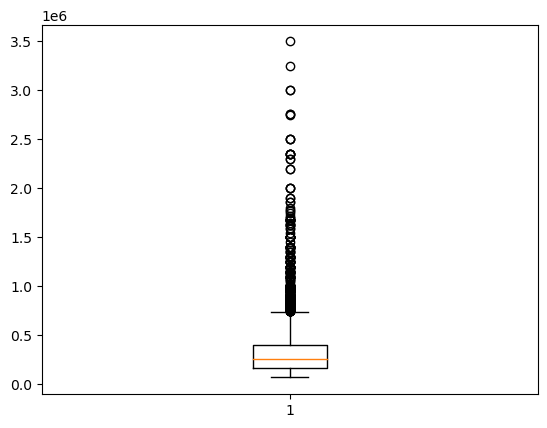

In [19]:
plt.boxplot(df['price'])

In [7]:
mean_longitude = (np.max(df.longitude) + np.min(df.longitude))/2
mean_latitude = (np.max(df.latitude) + np.min(df.latitude))/2

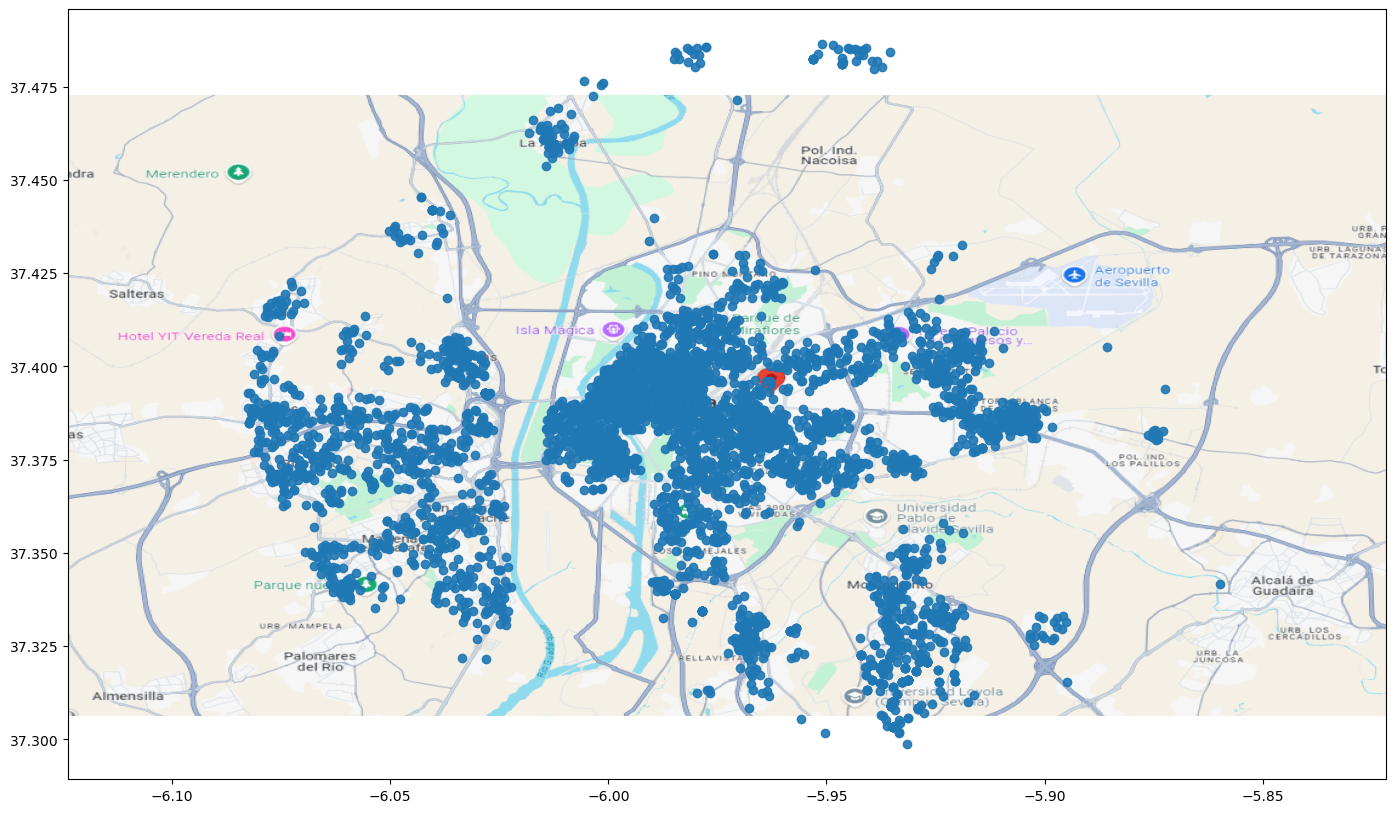

In [7]:
# Datos de entrada
# 37.28900872800054, -6.076192966210232
# 
min_latitude = 37.3062494269371  # Latitud de la esquina inferior izquierda
min_longitude = -6.1237252819805725# Longitud de la esquina inferior izquierda
width_m = 1000  # Ancho de la imagen en metros
height_m = 1000  # Alto de la imagen en metros

# Conversiones aproximadas de metros a grados en la ubicación específica
meters_per_deg_lat = 111320  # Aproximado para latitudes cercanas al ecuador
meters_per_deg_lon = 111320 * np.cos(np.radians(min_latitude))  # Ajuste según la latitud

# Calcular las coordenadas de la esquina superior derecha
max_latitude = 37.47259301974194
max_longitude = -5.82177073842795

# Cargar la imagen de Google Maps
imagen_google_maps = Image.open('mapasev.png')

# Mostrar la imagen como fondo
fig, ax = plt.subplots(figsize=(17, 10))
ax.imshow(imagen_google_maps, extent=[min_longitude, max_longitude, min_latitude, max_latitude], aspect='auto')

# Superponer los puntos
x, y = df.longitude.values, df.latitude.values
scatter = ax.scatter(x, y, alpha=0.9)
# scatter = ax.scatter(x, y, c=df.rentabilidad, cmap='RdYlGn', alpha=0.9)
# scatter = ax.scatter(x, y, c=df.price, cmap='RdYlGn_r', alpha=0.7)
# scatter = ax.scatter(x, y, c=df.y_pred, cmap='RdYlGn_r', alpha=0.7)
# Añadir una barra de color
# plt.colorbar(scatter, label='Precio')

# plt.xlabel('Longitud')
# plt.ylabel('Latitud')
plt.show()